## Background 

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

### Context

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

### Task 

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

### Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Scoring 

Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive
5

Illustrate the insights based on EDA
Key meaningful observations on the relationship between variables
5

Data Pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed), Feature Engineering, Prepare data for modelling and check the split
5

Model building - Logistic Regression
- Build the model and comment on the model statistics - Test assumptions - Filter out key variables that have a strong relationship with the dependent variable
12

Model performance evaluation and improvement
- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? if yes then do it
6

Model building - Decision Tree
- Build the model and comment on the model statistics - Identify the key variables that have a strong relationship with the dependent variable
5

Model performance evaluation and improvement
- Evaluate the model on appropriate metric - Comment on model performance - Can model performance be improved? if yes then do it
8

Actionable Insights & Recommendations
- Compare decision tree and Logistic regression - Conclude with the key takeaways for the marketing team - what would your advice be on how to do this campaign?
5

Misclassification analysis
- Do an analysis of all misclassified samples - Try to find a pattern among those
5

Notebook - Overall
- Conclude with the key takeaways for the business - What would your advice be to grow the business?
4 


In [4]:
#essentials 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

#logistic regression packages 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#classification packages 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [7]:
data = pd.read_csv('Loan_Modelling.csv') #read the csv.file 
loan = data.copy()

In [15]:
np.random.seed(1) #sets the same random samples each time
loan.sample(10) #random sample of 10 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


In [13]:
loan.shape #(r,c) 
print(f'There are {loan.shape[0]} rows and {loan.shape[1]} columns.') #r and c printed in full sentence 

There are 5000 rows and 14 columns.


In [16]:
loan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


no missing values, and all values are either integers or floats. 
some integers can be changed into categories 

In [38]:
loan["Family"] = loan["Family"].astype("category")
loan["Personal_Loan"] = loan["Personal_Loan"].astype("category")
loan["Securities_Account"] = loan["Securities_Account"].astype("category")
loan["CD_Account"] = loan["CD_Account"].astype("category")
loan["Online"] = loan["Online"].astype("category")
loan["CreditCard"] = loan["CreditCard"].astype("category")

In [39]:
loan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(6)
memory usage: 303.5 KB


In [18]:
loan[loan.duplicated()].count() #identify duplicates 

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [20]:
loan["ID"].nunique()

5000

In [21]:
loan.drop(["ID"],axis=1,inplace=True)

In [22]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [40]:
loan.describe(include="all")

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0
unique,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
freq,NaN,NaN,NaN,NaN,1472.0,NaN,NaN,NaN,4520.0,4478.0,4698.0,2984.0,3530.0
mean,45.338400,20.104600,73.774200,93169.257000,NaN,1.937938,1.881000,56.498800,NaN,NaN,NaN,NaN,NaN
std,11.463166,11.467954,46.033729,1759.455086,NaN,1.747659,0.839869,101.713802,NaN,NaN,NaN,NaN,NaN
min,23.000000,-3.000000,8.000000,90005.000000,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,35.000000,10.000000,39.000000,91911.000000,NaN,0.700000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,45.000000,20.000000,64.000000,93437.000000,NaN,1.500000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,55.000000,30.000000,98.000000,94608.000000,NaN,2.500000,3.000000,101.000000,NaN,NaN,NaN,NaN,NaN


In [26]:
loan["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

need to investigate what negative experience means 

In [27]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


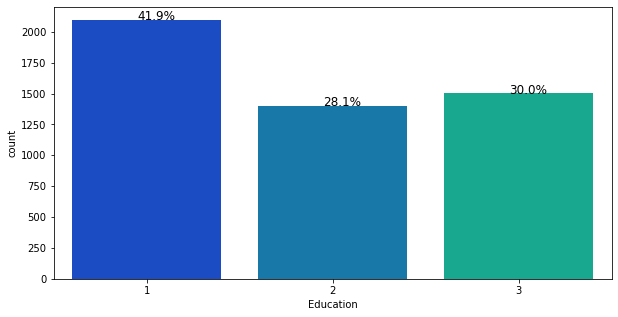

In [32]:
plt.figure(figsize=(10,5))
ax = sns.countplot(loan["Education"],palette='winter')
perc_on_bar(ax,loan["Education"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


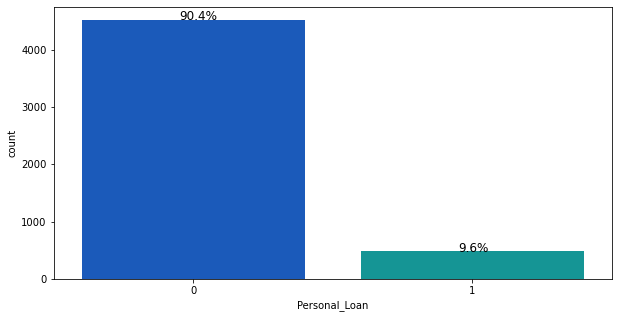

In [33]:
plt.figure(figsize=(10,5))
ax = sns.countplot(loan["Personal_Loan"],palette='winter')
perc_on_bar(ax,loan["Personal_Loan"])
